<a href="https://colab.research.google.com/github/shengchishih/Machine-Learning-and-Deep-Learning/blob/main/Fashion%20mnist-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-68dcbbe6-91a3-4fb0-587f-eba6784cad54)


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(48,(3,3),padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(96,(3,3),padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(192,(3,3),padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(64,activation='relu'))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 192)         166080    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 192)         0

In [ ]:
model.compile(loss='mse',
              optimizer=SGD(learning_rate=0.087),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 14s 8ms/step - loss: 0.0893 - accuracy: 0.1998
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0860 - accuracy: 0.4044
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0562 - accuracy: 0.6000
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0416 - accuracy: 0.6987
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.7384
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0337 - accuracy: 0.7624
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0317 - accuracy: 0.7776
Epoch 8/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0301 - accuracy: 0.7904
Epoch 9/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0288 - accuracy: 0.8000
Epoch 10/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0276 - accuracy: 0.808

In [ ]:
y_predict=np.argmax(model.predict(x_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def cnn_predict(n):
  print('CNN predict:',y_predict[n])
  X=x_test[n].reshape(28,28)
  plt.imshow(X,cmap='Greys')

CNN predict: 2


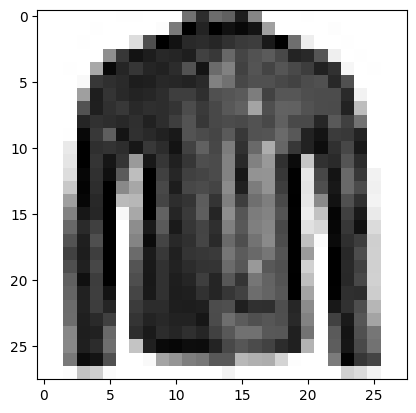

In [ ]:
cnn_predict(50)